### Importing Libraries

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### Creating class with functions required for image stitching

In [14]:
class panorama_stitch:

    def __init__(self,extractor):
        self.extractor=extractor

    def detectAndDescribe(self,img1,img2): 
        if self.extractor == 'sift':
            descriptor = cv2.SIFT_create()
        
        kpts1, features1 = descriptor.detectAndCompute(img1, None)
        kpts2, features2 = descriptor.detectAndCompute(img2, None)
        #plt.imshow(cv2.drawKeypoints(img1, kpts1, None, (255, 0, 255)))
        #plt.imshow(cv2.drawKeypoints(img2, kpts2, None, (255, 0, 255)))
        
        bf=self.createMatcher(True)
        matches = bf.match(features1,features2)
        self.draw_matches(img1,kpts1,img2,kpts2,matches)

        src_pts = np.zeros((len(matches), 1, 2), dtype=np.float32)
        dst_pts = np.zeros((len(matches), 1, 2), dtype=np.float32)
        for i in range(0,len(matches)):
            src_pts[i] = kpts1[matches[i].queryIdx].pt
            dst_pts[i] = kpts2[matches[i].trainIdx].pt
        H,status=cv2.findHomography(src_pts,dst_pts,cv2.RANSAC, 5.0)
        result=cv2.warpPerspective(img1,H, (img2.shape[1]+img1.shape[1], img2.shape[0]))
        result[0:img2.shape[0], 0:img2.shape[1]] = img2
        #plt.imshow(result)
        plt.show()
        return result
       

    def createMatcher(self,crossCheck): 
        if self.extractor == 'sift':
            bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
        return bf

    def draw_matches(self,img1, keypoints1, img2, keypoints2, matches):
        r, c = img1.shape[:2]
        r1, c1 = img2.shape[:2]
        # Create a blank image with the size of the first image + second image
        output_img = np.zeros((max([r, r1]), c+c1, 3), dtype='uint8')
        output_img[:r, :c, :] = np.dstack([img1[:,:,0], img1[:,:,1], img1[:,:,2]])
        output_img[:r1, c:c+c1, :] = np.dstack([img2[:,:,0], img2[:,:,1], img2[:,:,2]])
        # Go over all of the matching points and extract them
        for match in matches:
            img1_idx = match.queryIdx
            img2_idx = match.trainIdx
            (x1, y1) = keypoints1[img1_idx].pt
            (x2, y2) = keypoints2[img2_idx].pt
            # Draw circles on the keypoints
            cv2.circle(output_img, (int(x1),int(y1)), 4, (0, 255, 255), 1)
            cv2.circle(output_img, (int(x2)+c,int(y2)), 4, (0, 255, 255), 1)
            # Connect the same keypoints
            cv2.line(output_img, (int(x1),int(y1)), (int(x2)+c,int(y2)), (0, 255, 255), 1)
            plt.imshow(output_img)
            

### Reading images for image stitching

['f:\\Vs codes\\jupyter\\Vr\\assn2/stitching/IIITB1.jpg', 'f:\\Vs codes\\jupyter\\Vr\\assn2/stitching/IIITB2.jpg']


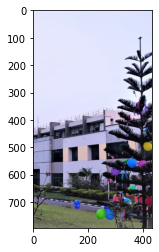

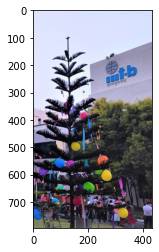

In [10]:
cwd=os.getcwd()
path=cwd+'/stitching'
img_path=[]
for file in os.listdir(path):
    img_path.append(path+'/'+file)
print(img_path)
img_array=[]
for im in img_path:
    img=cv2.imread(im)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_array.append(img)
    plt.imshow(img)
    plt.show()


### Creating object for panorama_stitch class and passing images to it to get the result

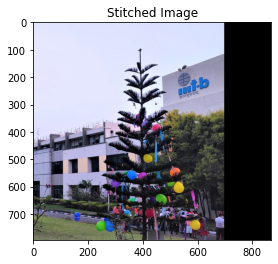

In [17]:
ps=panorama_stitch('sift')
result=img_array[0]
for i in range(1,len(img_array)):
    img2=img_array[i]
    result=ps.detectAndDescribe(img2,result)
    plt.imshow(result)
    plt.title('Stitched Image')
    plt.show()